# Data Exploraton

In this script, our objective is to explore the dataset using various plots, address clarifying questions, clean the data, and create a subset of the dataset to facilitate our analysis and answer specific questions.

## INDEX

- [Ensure clearfying questions](#Ensure-clearfying-questions)
- [Data Cleaning](#Data-Cleaning)
- [Explore Relationships](#Explore-Relationships!)  
    - [Correlation Heat Map](#Create-a-correlation-heatmap-using-seaborn)
        - [HEAT MAP INSIGHTS](#HEAT-MAP-INSIGHTS)
    - [Scatterplot](#Explore-the-relationship-between-Trust-and-Happiness-Score-with-Scatterplots )
        - [SCATTERPLOT INSIGHTS](#SCATTERPLOT-INSIGHTS)
    - [Subplot](#Create-a-subplot)
        - [SUBPLOT INSIGHTS](#SUBPLOT-INSIGHTS)
    - [Categorical plots](#Categorical-plots)
        - [CATEGORICAL PLOT INSIGHTS](#CATEGORICAL-PLOT-INSIGHTS)  
- [Answering Questions](#Answering-Clarifying-and-Funelling-Question)
    - [New questions to explore](#New-questions-to-explore)
- [Define a Hypotheses](#Define-a-Hypotheses)

In [31]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#set display parameter
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
#import World Happiness Record csv

path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_merged.csv'
df_whr = pd.read_csv(os.path.join(path), index_col = False)

## Ensure clearfying questions

**Clarifying question**  
Which region ranks highest, and conversely, which region ranks lowest?

**Clarifying question**  
How does Germany's happiness rank compare to that of other Western European countries?


## Which region ranks highest, and conversely, which region ranks lowest?


In [18]:
#Make a subset of data including countries which were counted in all years (8 years)

# Calculate the counts of each country
country_counts = df_whr['Country'].value_counts()

# Filter rows where the count is 8
filter_whr = df_whr[df_whr['Country'].isin(country_counts[country_counts == 8].index)]

In [38]:
#Find the mean of Happiness Rank from all regions participated 
filter_whr.groupby('Region')['Happiness Rank'].mean()


Region
Central and Eastern Europe             64.036765
Commonwealth of Independent States     81.625000
East Asia                              64.458333
Latin America and Caribbean            48.217105
Middle East and North Africa           82.794118
North America and ANZ                  11.218750
South Asia                            116.541667
Southeast Asia                         78.187500
Sub-Saharan Africa                    123.228448
Western Europe                         24.940476
Name: Happiness Rank, dtype: float64

In [76]:
mean_rank_by_region.sort_values(by='Mean Happiness Rank', ascending=True)

,Region,Mean Rank,Mean Happiness Rank
5,North America and ANZ,11.218750,1
9,Western Europe,24.940476,2
3,Latin America and Caribbean,48.217105,3
0,Central and Eastern Europe,64.036765,4
2,East Asia,64.458333,5
7,Southeast Asia,78.187500,6
1,Commonwealth of Independent States,81.625000,7
4,Middle East and North Africa,82.794118,8
6,South Asia,116.541667,9
8,Sub-Saharan Africa,123.228448,10


Based on the mean Rank from data the Happiness Rank based on the region is as follows:  

**Top 3 Happiness Region**
1. North America and ANZ	  
2. Western Europe	
3. Latin America and Caribbean

**Top 3 Least Happiness Region**
1. Middle East and North Africa
1. South Asia
1. Sub-Saharan Africa

In [108]:
# Create a subset including regions in the Top 3 Happiness Region 

Top3region = [
    'North America and ANZ'
    , 'Western Europe'
    ,'Latin America and Caribbean']

Top3region_filter = filter_whr.loc[filter_whr['Region'].isin(Top3region)]

In [109]:
# Create a subset including regions in the Top 3 Least Happiness Region 

Worst3region = [
    'Middle East and North Africa'
    , 'South Asia'
    ,'Sub-Saharan Africa']

Worst3region_filter = filter_whr.loc[filter_whr['Region'].isin(Worst3region)]

In [118]:
# Create a subset that combines both Top3 and Worst 3 

combined = pd.concat([Top3region_filter, Worst3region_filter], axis='rows', join='inner')


In [119]:
#Export to csv

Top3region_filter.to_csv(os.path.join(path, 'Clean', 'Top3Happy.csv'))
Worst3region_filter.to_csv(os.path.join(path, 'Clean', 'Worst3Happy.csv'))
combined.to_csv(os.path.join(path, 'Clean', 'TopWorstCombined.csv'))

## Data Cleaning

In [14]:
#import dataset 
path2 = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/Top3Happy.csv'
Top_whr = pd.read_csv(os.path.join(path2), index_col = False)

Drop unnecessary columns 

In [15]:
Dropcolumns = ['Unnamed: 0.2'
               ,'Unnamed: 0.1'
                ,'Unnamed: 0'
                ,'Happiness Rank'
                ,'Rank.1'
                ,'Rank.2'
                ,'Rank.3'
                ,'Mean Rank'
                ,'Year'
                ,'Unnamed: 0.1'
               ,'Rank'
]

Top_whr = Top_whr.drop(columns=Dropcolumns)


In [ ]:
Top_whr.info()

In [17]:
Top_whr.head(5)

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Finland,Western Europe,7.406,1.29025,0.88911,0.64169,0.41372,0.23351


# Explore Relationships! 

## Top 3 Happiest Region

In [150]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [153]:
# Create a correlation matrix using pandas

Top_whr.corr()

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/3147461967.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Top_whr.corr()


,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.561298,0.439018,0.614210,0.774654,0.536943
Economy (GDP per Capita),0.561298,1.000000,0.348286,0.331612,0.569527,0.209717
Health (Life Expectancy),0.439018,0.348286,1.000000,0.029638,0.350512,0.283862
Freedom,0.614210,0.331612,0.029638,1.000000,0.580375,0.377255
Trust (Government Corruption),0.774654,0.569527,0.350512,0.580375,1.000000,0.496362
Generosity,0.536943,0.209717,0.283862,0.377255,0.496362,1.000000


/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/1818797539.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(Top_whr.corr())


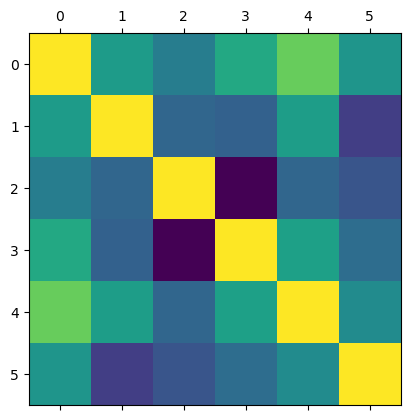

In [154]:
# Create a correlation heatmap using matplotlib

plt.matshow(Top_whr.corr())
plt.show()

In [168]:
# Save the figure as a PNG file
plt.savefig('correlation_matrix.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/905554982.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(Top_whr.corr(), fignum=f.number)  # type of plot
/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/905554982.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(range(Top_whr.corr().shape[1]), Top_whr.corr().columns, fontsize=14, rotation=90)  # x axis labels with increased rotation
/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/905554982.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to Fa

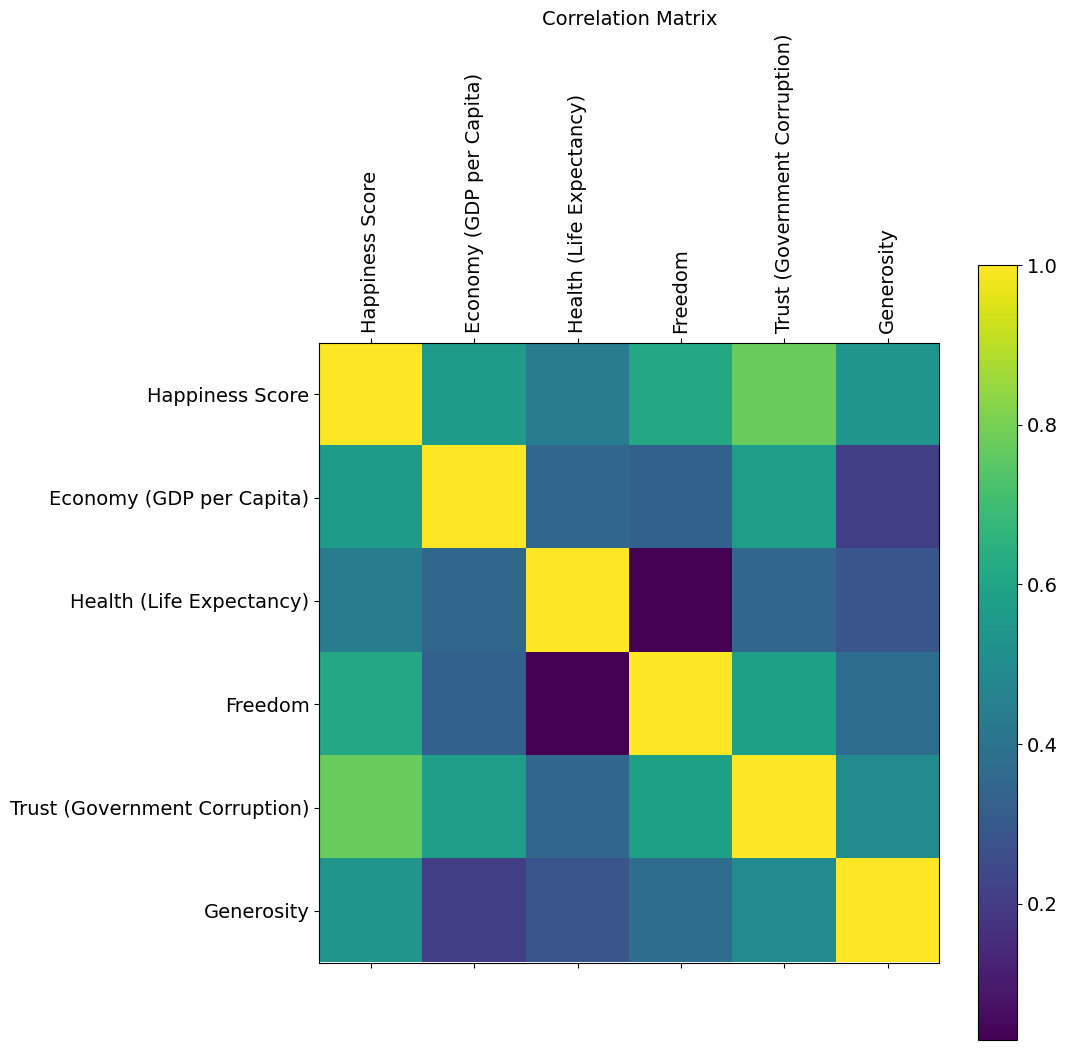

In [169]:
f = plt.figure(figsize=(10, 10))  # figure size
plt.matshow(Top_whr.corr(), fignum=f.number)  # type of plot
plt.xticks(range(Top_whr.corr().shape[1]), Top_whr.corr().columns, fontsize=14, rotation=90)  # x axis labels with increased rotation
plt.yticks(range(Top_whr.corr().shape[1]), Top_whr.corr().columns, fontsize=14)  # y axis labels
cb = plt.colorbar()  # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size
plt.title('Correlation Matrix', fontsize=14)  # add title

# Save the figure as a PNG file
plt.savefig('correlation_matrix.png', bbox_inches='tight')

plt.show()

### Create a correlation heatmap using seaborn:

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_44253/1952596899.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(Top_whr.corr(), annot=True, ax=ax)


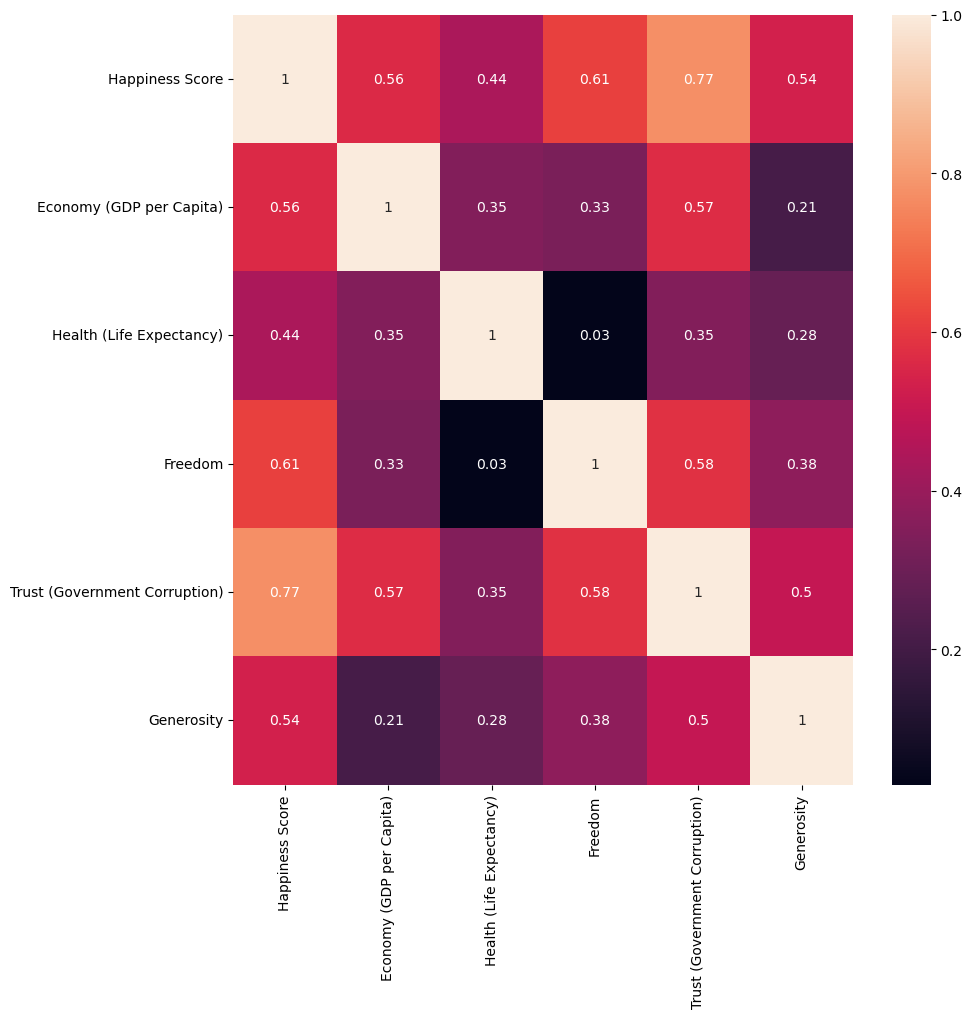

In [172]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(Top_whr.corr(), annot=True, ax=ax)

# Save the plot as an image file (e.g., PNG)
fig = corr.get_figure()
fig.savefig('correlation_heatmap.png', bbox_inches='tight')

### HEAT MAP INSIGHTS

- Trust of the government has a strong positive correlation with Happiness Score. 
- Extremely weak correlation between Health and Freedom variables. 
- Freedom has a moderate relationship with Happiness Score. 

### Explore the relationship between Trust and Happiness Score with Scatterplots 

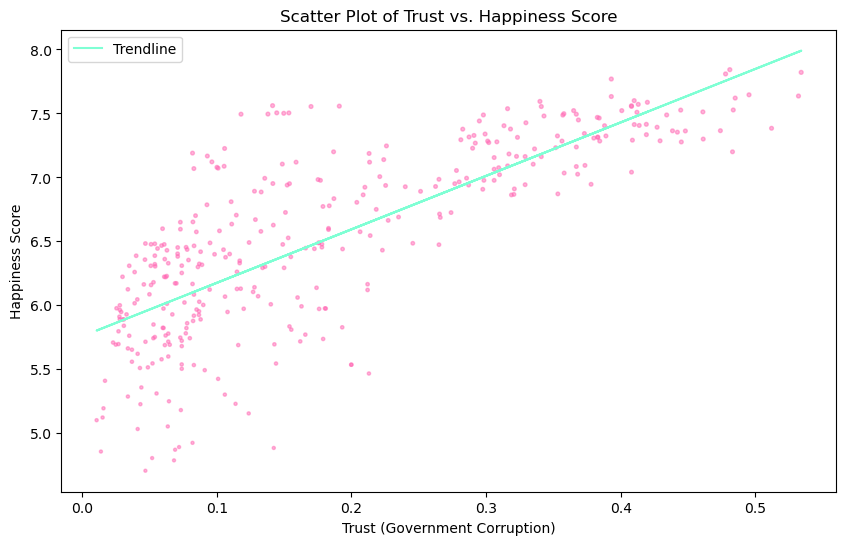

In [10]:
# Data
xpoints = np.array(Top_whr['Trust (Government Corruption)'])
ypoints = np.array(Top_whr['Happiness Score'])
sizes = np.array(Top_whr['Happiness Score'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(xpoints, ypoints, c='hotpink', s=sizes, alpha=0.5)

# Fit a trendline (regression line)
z = np.polyfit(xpoints, ypoints, 1)
p = np.poly1d(z)
plt.plot(xpoints, p(xpoints), 'Aquamarine', label='Trendline')

# Set x-axis and y-axis labels
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')

# Set title
plt.title('Scatter Plot of Trust vs. Happiness Score')

# Add a legend
plt.legend()

# Save the figure
plt.savefig('scatterplot.png')

plt.show()

### SCATTERPLOT INSIGHTS

- A notable correlation exists between Happiness Score and Trust in the government. Specifically, as Trust in the government increases, so does the Happiness Score.
- There are outlier data points with Trust values ranging from 0.1 to 0.2, where the Happiness Score significantly rises.

### Create a subplot

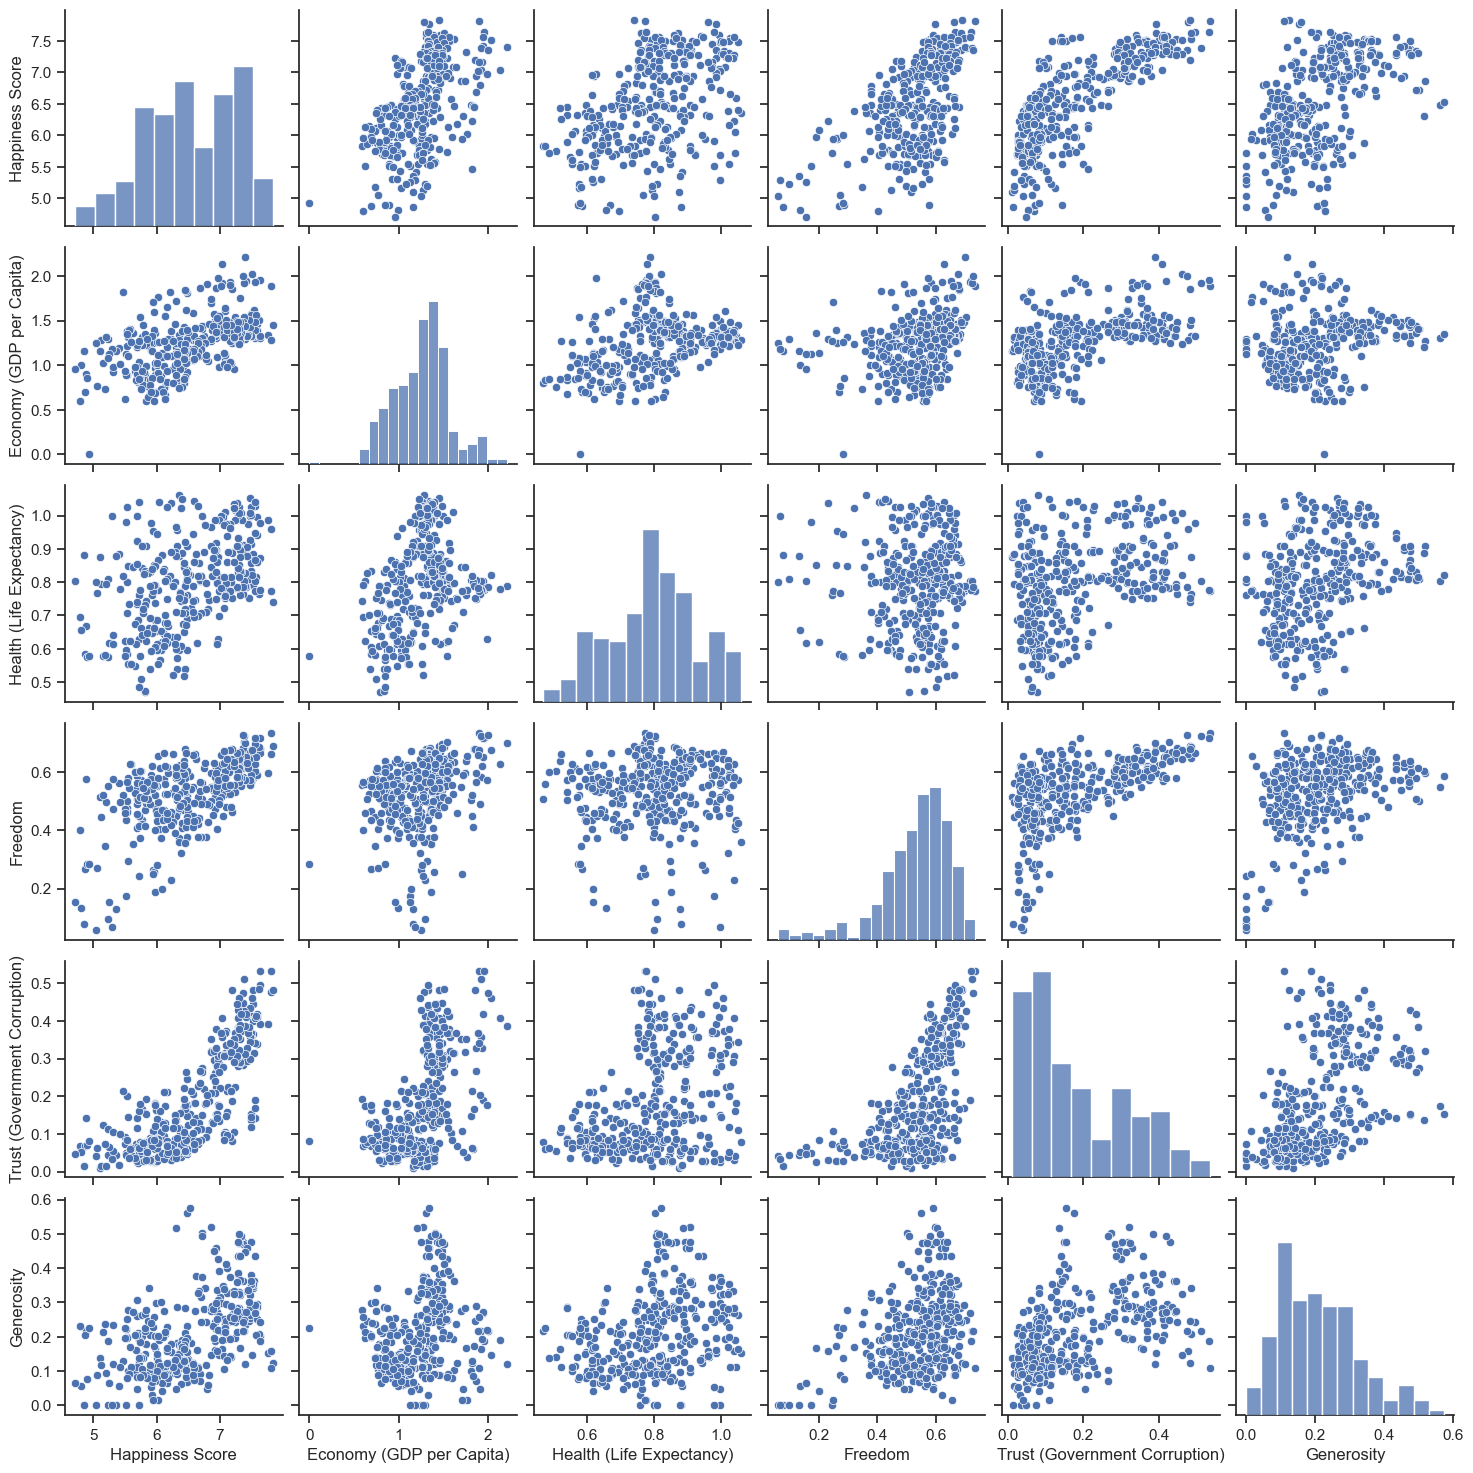

In [221]:
# Create a pair plot
g = sns.pairplot(Top_whr)
plt.savefig('pairplot.png')

### SUBPLOT INSIGHTS

- Neither Economy and Health have strong relationship with other variables. 
- For Top 3 Happy countries, the freedom tends tos core high but the trust towards the Government scores relatively low. 

### Categorical plots

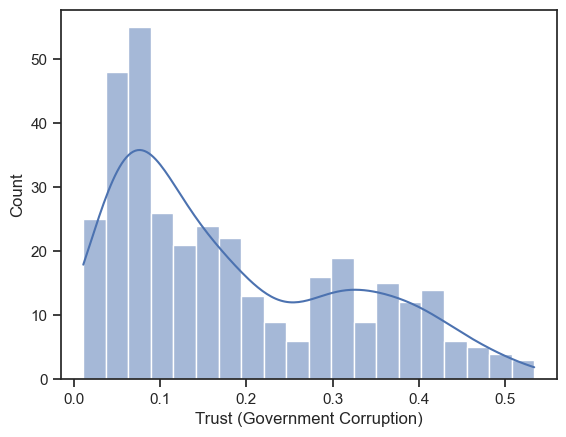

In [222]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(Top_whr['Trust (Government Corruption)'], bins = 20, kde = True)
plt.savefig('Histogram.png')

**Categorize the trust level** 

'Low Trust' < 0.08  
'Medium Trust' >= 0.08 and < 0.42   
'High Trust' >= 0.42


In [19]:
Top_whr.loc[Top_whr['Trust (Government Corruption)'] < 0.09, 'Trust Category'] = 'Low Trust'

In [20]:
Top_whr.loc[(Top_whr['Trust (Government Corruption)'] >= 0.09) & (Top_whr['Trust (Government Corruption)'] < 0.4), 'Trust Category'] = 'Medium Trust'


In [21]:
Top_whr.loc[Top_whr['Trust (Government Corruption)'] >= 0.4, 'Trust Category'] = 'High Trust'

In [209]:
#count of Trust Category
Top_whr['Trust Category'].value_counts()

Medium Trust    190
Low Trust       129
High Trust       33
Name: Trust Category, dtype: int64

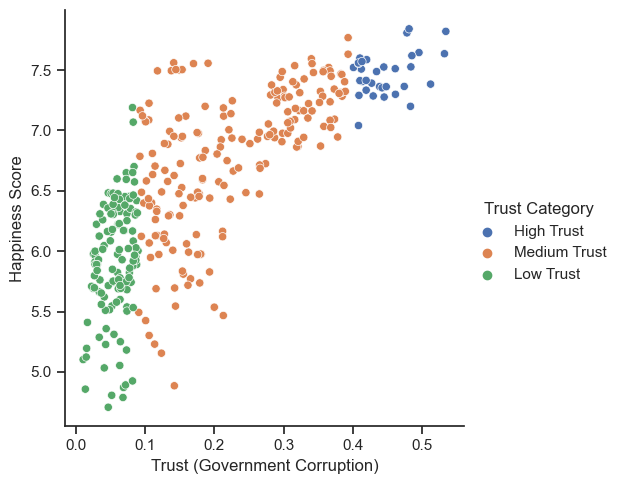

In [35]:
# Create a categorical plot in Seaborn
sns.set(style="ticks")
g = sns.relplot(x="Trust (Government Corruption)", y='Happiness Score', hue="Trust Category", data=Top_whr)
plt.savefig('categorical.png')

### CATEGORICAL PLOT INSIGHTS

- In the High Trust Category, the Happiness Score consistently remains at a high level. However, the Medium Trust Category exhibits greater variability, indicating the presence of more outliers.
- Overall, the trend shows remarkable stability, and there is a strong, positive relationship between Happiness Score and Trust.

## Answering Clarifying and Funelling Question

**Q1:**  Which region ranks highest, and conversely, which region ranks lowest?  

**A1:** 


In [228]:
mean_rank_by_region.sort_values(by='Mean Happiness Rank', ascending=True)

,Region,Mean Rank,Mean Happiness Rank
5,North America and ANZ,11.218750,1
9,Western Europe,24.940476,2
3,Latin America and Caribbean,48.217105,3
0,Central and Eastern Europe,64.036765,4
2,East Asia,64.458333,5
7,Southeast Asia,78.187500,6
1,Commonwealth of Independent States,81.625000,7
4,Middle East and North Africa,82.794118,8
6,South Asia,116.541667,9
8,Sub-Saharan Africa,123.228448,10


**Q2:** Is the economy a significant contributing factor to these rankings?  

**A2:** Correlation heatmaps reveal that there is a relatively weak relationship between all variables. Even concerning the Happiness Score, the correlation is modest. Instead, the data exploration highlights that factors such as Trust in the government and Freedom to make life choices exert a stronger influence on a nation's happiness.

### New questions to explore 

- How about The 3 Least Happiest Regions? Are the happiness factors different? Conduct the same data exploration to compare the data. 
- What about it for a specific country like Germany? 

# Define a Hypotheses

Hypothesis 1: Countries are more likely to experience happiness when there is a high level of trust in the government and when individuals have freedom in making life choices.

## [Back to TOP](#INDEX)